
---

<center><h1></h></center>

<center><h1> Skills 8: Performance Evaluation of Biometric Systems </h></center>
<center>
    <img src="https://le-cdn.website-editor.net/s/9d802a9e77324ea49af5974d51d75a28/dms3rep/multi/opt/Logo_iPSRS_GOOD-1920w.png?Expires=1733604125&Signature=EZaAUC-oIEj6kJdl2PPmpG-M~-TQXxzS0pZf6zrijszvOUIXEkSXkcg3BRKn1YWJKSumyXpF0TsePw78yE2u4Qti43qdkjdz8jH3u3OhLy5fdK0F~0Y3ejtuVeAyWMgka0KyWA6~9KAKdkZX-pQsXoJq5hzjeFWTx0lfK5GKyBhJmTcmGIahuD4WFZFg-aNCC4Sa78iNHslu9tqrVUpnE~8Sl~CDut1pZ-wxJ9z54E~K2re7j5LTP~w72HtFjl1dU76o-MWu-DNQ8wUf8EV0gTk8IkK-Rnk1eHR06ThqAqatJn6yWXdpuUdbRPcplwhN2gMOJGh5Mun~KGEl~ZaDVQ__&Key-Pair-Id=K2NXBXLF010TJW", width=250>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7qOQzhswn5yYVpbD6SL8SQtKuZT4IBwf8tg&s", width=150>
</center>

<center>Fromsa Teshome Negasa, </center>
<center>Photonics for Security, Reliability, and Safety (PSRS)</center>
<center>Biometrics Course Assignment</center>
<center>Prof. Amine Nait-Ali, Instructor</center>
<center>21<sup>st</sup> November 2024</center>

<center><h1></h></center>

---

Lab Objectives:
* **Calculate and visualize** key biometric performance metrics: False Acceptance
Rate (FAR), False Rejection Rate (FRR), and Equal Error Rate (EER).
* **Plot** and **interpret** biometric system performance with ROC and DET curves.
* Analyze and discuss the implications of the biometric system’s performance in various security scenarios through calculated metrics and visualizations.

# Part 1: Understanding the Dataset and Biometric Metrics

Import the nessecary modules and libraries

In [1]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import (
    roc_curve, auc, det_curve, DetCurveDisplay, RocCurveDisplay, roc_auc_score
)
from scipy.stats import norm

## 1 Dataset Overview

#### Load the dataset and inspect its structure

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Change to the directory containing the Colab file and CSV file
os.chdir('/content/drive/My Drive/Colab Notebooks/psrs-biometrics/biometrics-skills/skill_8/')
!ls "/content/drive/My Drive/Colab Notebooks/psrs-biometrics/biometrics-skills/skill_8/"

'biometrics skill 8: Performance Evaluation of Biometric Systems'
 Biometric_System_Evaluation_Dataset.csv


In [4]:
# Load and display the first few rows of the datasetthe dataset
data = pd.read_csv('Biometric_System_Evaluation_Dataset.csv')
data.head()

,Score,Label
0,0.749671,Genuine
1,0.686174,Genuine
2,0.764769,Genuine
3,0.852303,Genuine
4,0.676585,Genuine


In [5]:
# Inspect the structure of the dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   1000 non-null   float64
 1   Label   1000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [6]:
# Check the distribution of labels
genuine_count = data[data['Label'] == 'Genuine'].shape[0]
imposter_count = data[data['Label'] == 'Impostor'].shape[0]

print(f"Number of Genuine Scores: {genuine_count}")
print(f"Number of Imposter Scores: {imposter_count}")

Number of Genuine Scores: 500
Number of Imposter Scores: 500


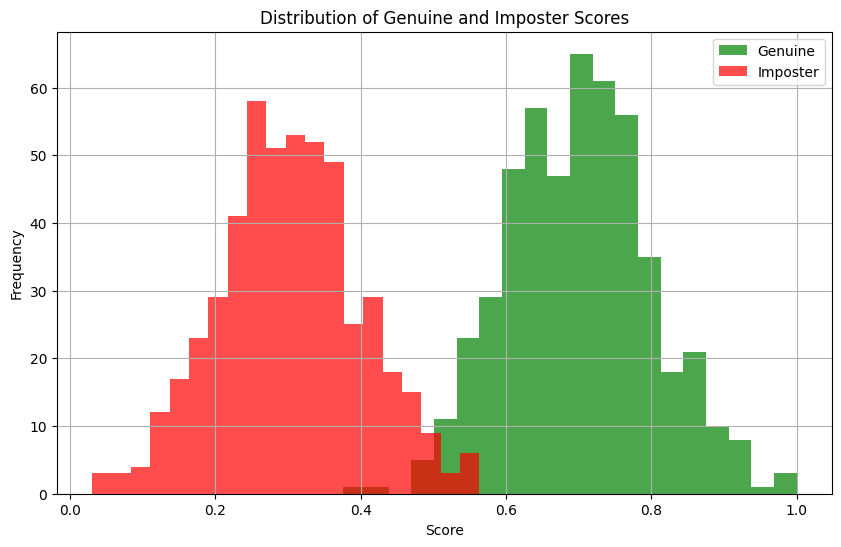

(None, <matplotlib.legend.Legend at 0x7c64cde3d090>, None)

In [7]:
# Visualize the distribution of scores
plt.figure(figsize=(10, 6))
plt.hist(data[data['Label'] == 'Genuine']['Score'], bins=20, alpha=0.7, label='Genuine', color='green')
plt.hist(data[data['Label'] == 'Impostor']['Score'], bins=20, alpha=0.7, label='Imposter', color='red')
plt.title("Distribution of Genuine and Imposter Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(), plt.legend(), plt.show()

#### FAR, FRR, and EER

**False Acceptance Rate (FAR)**

*  Measures how often the system incorrectly grants access to imposters by misclassifying them as genuine users.

*  A high FAR indicates security vulnerabilities, as unauthorized individuals can gain access.


**False Rejection Rate (FRR)**

*  Measures how often the system denies access to genuine users by misclassifying them as imposters.

*  A high FRR means the system becomes inconvenient for legitimate users, as they might be denied access despite their authenticity.


**Equal Error Rate (EER)**

*  The point at which FAR equals FRR, representing a balance between security and convenience.

*  A lower EER indicates a more accurate system, summarizing the system’s overall performance.




## 2 Basic Data Exploration

**Overall Statistics**

* **Mean**: The average score across the entire dataset
* **Standard Deviation**: Shows how spread out the scores are from the mean.
* **Minimum** and **Maximum** Scores: These highlight the range of scores.

**Group-wise Statistics**

* *Genuine Scores:*
    * Mean and standard deviation of Genuine scores show typical values and variability for legitimate users.

* *Imposter Scores:*
    * These metrics for Imposter scores provide insights into the system's ability to separate imposters from genuine users.

In [8]:
# Calculate basic statistics
mean_score = data['Score'].mean()
std_dev_score = data['Score'].std()
min_score = data['Score'].min()
max_score = data['Score'].max()

# Calculate statistics separately for Genuine and Imposter scores
genuine_scores = data[data['Label'] == 'Genuine']['Score']
imposter_scores = data[data['Label'] == 'Impostor']['Score']

genuine_mean = genuine_scores.mean()
genuine_std_dev = genuine_scores.std()
imposter_mean = imposter_scores.mean()
imposter_std_dev = imposter_scores.std()

In [9]:
# Display the statistics
print(f"Overall Dataset:")
print(f"  Mean Score:           {mean_score:.4f}")
print(f"  Standard Deviation:   {std_dev_score:.4f}")
print(f"  Min Score:            {min_score:.4f}")
print(f"  Max Score:            {max_score:.4f}\n")

print(f"Genuine Scores:")
print(f"  Mean Score:           {genuine_mean:.4f}")
print(f"  Standard Deviation:   {genuine_std_dev:.4f}\n")

print(f"Imposter Scores:")
print(f"  Mean Score:           {imposter_mean:.4f}")
print(f"  Standard Deviation:   {imposter_std_dev:.4f}")

Overall Dataset:
  Mean Score:           0.5018
  Standard Deviation:   0.2214
  Min Score:            0.0303
  Max Score:            1.0000

Genuine Scores:
  Mean Score:           0.7005
  Standard Deviation:   0.0975

Imposter Scores:
  Mean Score:           0.3032
  Standard Deviation:   0.0978


# Part 2: Calculating and Visualizing FAR, FRR, and EER

## 1 Threshold Definition

To evaluate the performance of the biometric system at different sensitivity levels, a range of thresholds from 0 to 1 with a step size of 0.01 is defined.

In [10]:
# Define thresholds from 0 to 1 with a step size of 0.01
thresholds = np.arange(0, 1.01, 0.01)

## 2 Calculation of FAR and FRR

For each threshold, calculated are the:

1. False Acceptance Rate (FAR), which is the ratio of impostor scores exceeding the threshold to the total number of impostor attempts, and
2. False Rejection Rate (FRR) which is the ratio of genuine scores falling below the threshold to the total number of genuine attempts.

The loop iterates through all thresholds, counting the false acceptances and rejections at each step.

In [11]:
def calculate_far_frr(thresholds, imposter_scores, genuine_scores):
    # Initialize lists to store FAR and FRR values
    far_values = []
    frr_values = []

    # Loop through each threshold and calculate FAR and FRR
    for threshold in thresholds:
        # False Acceptances: Imposter scores exceeding the threshold
        false_acceptances = np.sum(imposter_scores > threshold)
        # False Rejections: Genuine scores below the threshold
        false_rejections = np.sum(genuine_scores < threshold)

        # Total Imposter and Genuine attempts
        total_imposter_attempts = len(imposter_scores)
        total_genuine_attempts = len(genuine_scores)

        # Calculate FAR and FRR
        far = false_acceptances / total_imposter_attempts if total_imposter_attempts != 0 else 0
        frr = false_rejections / total_genuine_attempts if total_genuine_attempts != 0 else 0

        far_values.append(far)
        frr_values.append(frr)

    return far_values, frr_values


Helper Functions

In [12]:

def find_EER(far_values, frr_values, thresholds):
    # Calculate the absolute differences between FAR and FRR
    delta = np.abs(np.array(far_values) - np.array(frr_values))

    # Find the index where the difference is minimum (EER point)
    eer_index = np.argmin(delta)

    # Return the FAR at EER, FRR at EER, and the threshold at EER
    return far_values[eer_index], frr_values[eer_index], thresholds[eer_index]

def plot_DET_curve(far_values, frr_values, addedPlots=None):
    plt.figure(figsize=(10, 6))
    plt.plot(far_values, frr_values, linestyle="--", color='blue', linewidth=4, label="DET Curve")
    if addedPlots is not None:
        addedPlots()
    plt.xlabel('False Acceptance Rate (FAR)')
    plt.ylabel('False Rejection Rate (FRR)')
    plt.title('Detection Error Tradeoff (DET) curve')
    plt.legend()
    plt.grid()
    plt.show()

def addedPlots():
    plt.plot(far_opt, frr_opt, 'ro', label="EER Point")
    plt.plot([1.0, 0.0], [0.0, 1.0], "k--")  # Draw the default DET Curve from 1-1

In [13]:
# Extract genuine and imposter scores from the data
genuine_scores = data[data['Label'] == 'Genuine']['Score']
imposter_scores = data[data['Label'] == 'Impostor']['Score']

# Calculate FAR and FRR values for the given thresholds
far_values, frr_values = calculate_far_frr(thresholds, imposter_scores, genuine_scores)

# Find the EER (Equal Error Rate) point
far_opt, frr_opt, eer_threshold = find_EER(far_values, frr_values, thresholds)

# Calculate the EER value
eer = (far_opt + frr_opt) / 2
print(f"Equal Error Rate (EER): {eer:.4f}")

Equal Error Rate (EER): 0.0210


## 3 Identifying and Visualizing EER

Identifying EER
* The Equal Error Rate (EER) occurs when FAR equals FRR. We calculate the EER by finding the threshold where the absolute difference between FAR and FRR is minimized.

Visualization
* FAR and FRR are plotted against the thresholds to show their relationship.
* The EER is marked on the plot with a vertical line at the threshold where FAR equals FRR.
* Detection Error Tradeoff (DET) curve


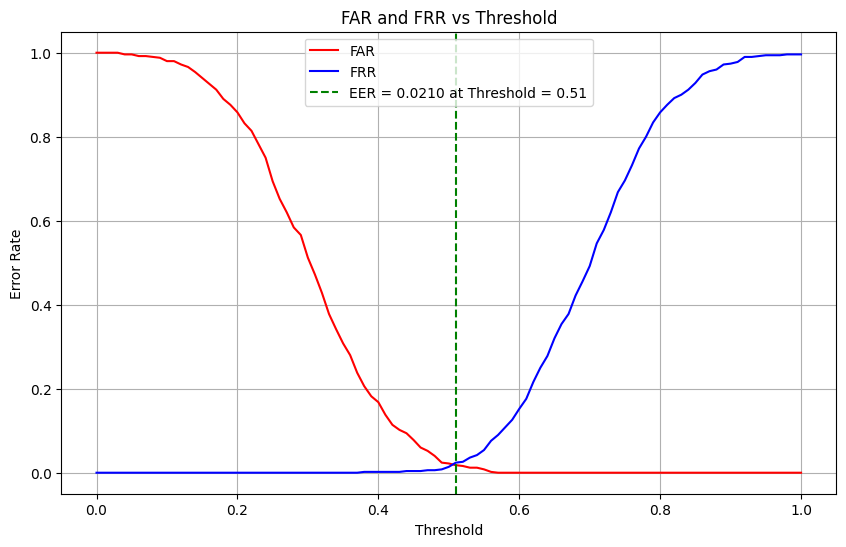

(<matplotlib.legend.Legend at 0x7c64cb608700>, None, None)

In [14]:
# Plot FAR and FRR against thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, far_values, label='FAR', color='red')
plt.plot(thresholds, frr_values, label='FRR', color='blue')
plt.axvline(eer_threshold, color='green', linestyle='--', label=f'EER = {eer:.4f} at Threshold = {eer_threshold:.2f}')
plt.xlabel('Threshold'), plt.ylabel('Error Rate')
plt.title('FAR and FRR vs Threshold')
plt.legend(), plt.grid(), plt.show()

# Part 3: ROC Curve Visualization

## 1 ROC Curve Calculation


The **Receiver Operating Characteristic (ROC)** Curve provides a comprehensive view of the biometric system's performance by plotting the True Positive Rate (TPR) against the False Positive Rate (FAR) across various thresholds. Using Scikit-Learn's `roc_curve` function:

1. True Positive Rate (TPR): Measures the proportion of correctly classified `Genuine` scores (1 - FRR).
2. False Positive Rate (FPR): Measures the proportion of misclassified `Imposter` scores (equivalent to FAR).

The Area Under the Curve (AUC) quantifies the overall performance of the system. A higher AUC value (closer to 1) indicates better separation between `Genuine` and `Imposter` scores.



In [15]:
# Prepare the labels: Convert 'Genuine' to 1 and 'Imposter' to 0
data['Binary_Label'] = data['Label'].apply(lambda x: 1 if x == 'Genuine' else 0)

# Calculate the False Positive Rate (FAR), True Positive Rate (TPR), and thresholds
fpr, tpr, roc_thresholds = roc_curve(data['Binary_Label'], data['Score'])

# Calculate the Area Under the Curve (AUC)
roc_auc = roc_auc_score(data['Binary_Label'], data['Score']) # roc_auc = auc(fpr, tpr)

# Print AUC
print(f"\nArea Under the Curve (AUC) : {roc_auc:.4f}")


Area Under the Curve (AUC) : 0.9984


## 2 Plotting the ROC Curve

#### Visualization of the ROC curve

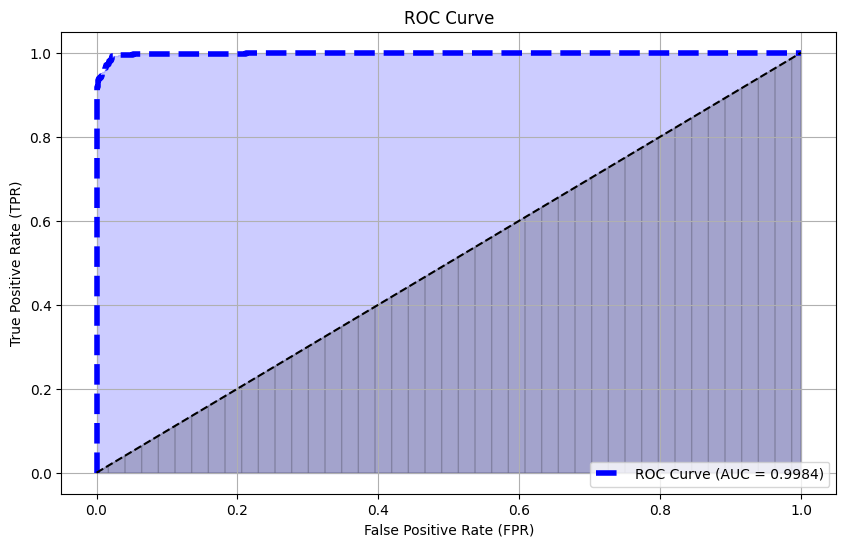

(<matplotlib.legend.Legend at 0x7c64cb6a47c0>, None, None)

In [16]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))

plt.plot(fpr, tpr, color='blue', linestyle='--', linewidth=4, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue') # Shade the area under the ROC curve

plt.plot([0, 1], [0, 1], color='k', linestyle='--') # Random Guess with AUC = 0.5
plt.fill_between([0, 1], [0, 1], color='black', alpha=0.2, hatch='|') # Shade the area under the ROC curve with a pattern

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right'), plt.grid(), plt.show()

#### Discussion on the plot

The ROC Curve visualizes the tradeoff between the False Positive Rate (FAR) and True Positive Rate (TPR) across all thresholds:

* The blue line represents the system’s performance, the blue shade represents the Area Under the curve with a value of `0.9984`.
* The black dashed line indicates random guessing (`AUC = 0.5`).
* The closer the ROC curve is to the top-left corner (larger area), the better the system performs.


Generally speaking, the ROC curve and AUC offer several advantages for evaluating a biometric system:

1. Unlike EER, which focuses on a single operating point, the ROC curve evaluates the system's performance across all thresholds, hence threshold Independent.
2. The AUC allows for direct comparison between different systems or algorithms, with higher AUC values indicating superior performance.

3. The ROC curve helps in selecting an optimal threshold based on the acceptable tradeoff between security (low FAR) and usability (low FRR).

# Part 4: DET Curve Visualization

## 1 Transform and Plot FAR and FRR

### Detection Error Tradeoff (DET): Overview


A Detection Error Tradeoff (DET) curve is a graphical plot used to evaluate the performance of binary classification systems, particularly in biometric and speaker recognition systems. It plots the False Rejection Rate (FRR) against the False Acceptance Rate (FAR) at various threshold settings.

A DET curve closer to the origin (lower left corner) indicates better performance, as it signifies lower error rates.




Using the helper function from Alexandar'c Face biometrics class, we can use the custome `plot_DET_curve()` function on the above `far_values` and `frr_values` data which were obtained from another cutome function: `calculate_far_frr()`

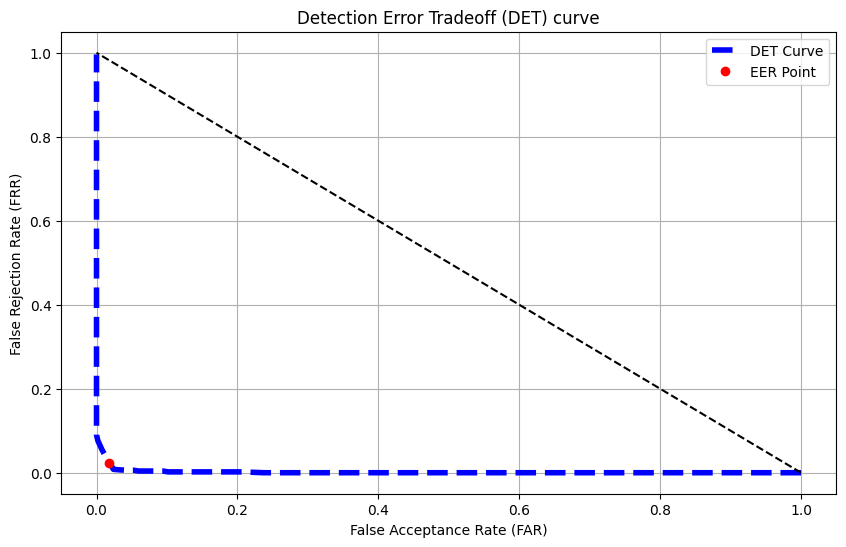

In [17]:
plot_DET_curve(far_values, frr_values, addedPlots=addedPlots)

### Transformation

The DET Curve can be ploted over a normal deviate transformation to better visualize small differences in error rates.

According to the SciKit-learn documentation, DET curves are commonly plotted in normal deviate scale. To achieve this the DET display transforms the error rates as returned by the `det_curve` and the axis scale using `scipy.stats.norm`.

In [18]:
# Calculate the False Positive Rate (FAR), True Positive Rate (TPR), and thresholds
fpr, fnr, _ = det_curve(data['Binary_Label'], data['Score'])

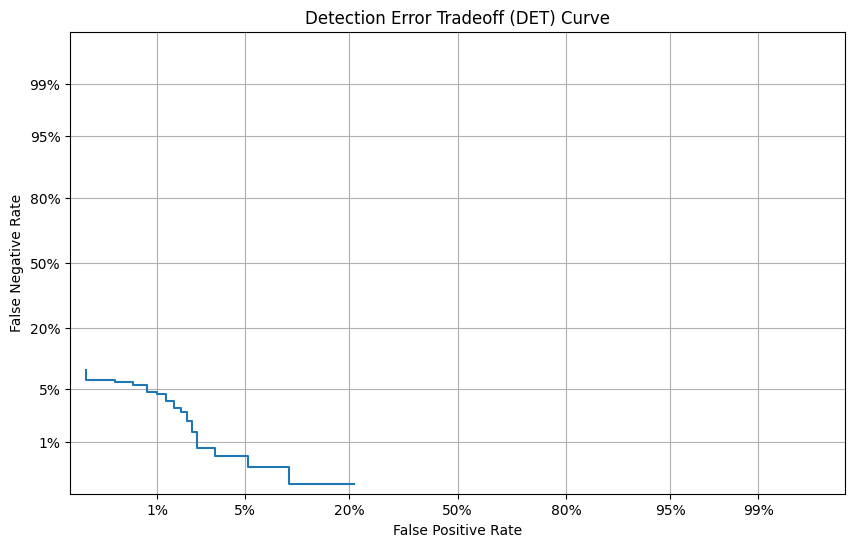

In [19]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the DetCurveDisplay object
display = DetCurveDisplay(fpr=fpr, fnr=fnr)

# Plot the DET curve on the created axes
display.plot(ax=ax)  # Pass the axes to the plot method

# Add title and grid
ax.set_title("Detection Error Tradeoff (DET) Curve")
ax.grid(True)

plt.show()

## 2 Discussion on DET Curve Advantages

The DET Curve offers several advantages when visualized in the normal deviate scale:

1. By using a normal deviate scale, the DET curve magnifies small changes in FAR and FRR, which are critical for high-performing biometric systems.
2. The transformation ensures a balanced view of error rates, making it easier to compare systems with similar performance.
3. It allows for precise tuning of thresholds in regions where both FAR and FRR are very low, which is crucial for applications requiring high reliability.

# Part 5: Interpretation and Analysis

## 1 Analyzing the EER, ROC, and DET Curves

1. Equal Error Rate (EER):

    * The EER is a critical performance metric for biometric systems. It represents the threshold where the False Acceptance Rate (FAR) equals the False Rejection Rate (FRR).
    * A lower EER indicates better overall system accuracy and balance between security (low FAR) and usability (low FRR).
2. ROC Curve:

    * The Receiver Operating Characteristic (ROC) Curve illustrates the trade-off between FAR and True Positive Rate (1 - FRR) at various thresholds.
    * A curve that hugs the top-left corner indicates high system performance. The Area Under the Curve (AUC) quantifies the overall effectiveness, with values closer to 1 signifying near-perfect classification.
3. DET Curve:

    * The Detection Error Tradeoff (DET) Curve focuses on the detailed behavior of FAR and FRR, particularly in regions of low error rates. It is helpful for high-accuracy systems where small variations in error rates matter.
    * Its symmetric nature provides a clear view of system behavior, aiding in threshold optimization.

## 2  Discussing FAR and FRR Trade-offs

Trade-offs Between FAR and FRR
* FAR (False Acceptance Rate):
    * Measures how often the system falsely accepts impostors.
    * A high FAR compromises security, as unauthorized users may gain access.
* FRR (False Rejection Rate):
    * Measures how often the system falsely rejects genuine users.
    * A high FRR reduces usability, leading to frustration for legitimate users.

Trade-offs: Adjusting the system threshold shifts the balance between FAR and FRR:
* Lowering the threshold decreases FAR (improves security) but increases FRR (reduces usability).
* Raising the threshold decreases FRR (improves usability) but increases FAR (compromises security).

## 3 Scenario Analysis


Different applications require varying levels of security and convenience. Let’s analyze two scenarios:

1. Smartphone Authentication:

    * Priority: Convenience is critical. A higher threshold is preferable to minimize FRR, even if it slightly increases FAR.
    * Justification: Users are likely in possession of their phones, so the risk of impostors is lower.

2. High-Security Facility:

    * Priority: Security is paramount. A lower threshold is necessary to minimize FAR, even if it increases FRR.
    * Justification: The potential damage from an impostor gaining access outweighs the inconvenience to legitimate users.

Threshold Adjustment

In [20]:
# Adjusting the threshold for different scenarios
low_security_threshold = 0.7  # Higher threshold for convenience
high_security_threshold = 0.3  # Lower threshold for security

# Calculate FAR and FRR for the selected thresholds
low_security_far = np.sum((data['Score'] > low_security_threshold) & (data['Label'] == 'Impostor')) / np.sum(data['Label'] == 'Impostor')
low_security_frr = np.sum((data['Score'] <= low_security_threshold) & (data['Label'] == 'Genuine')) / np.sum(data['Label'] == 'Genuine')

high_security_far = np.sum((data['Score'] > high_security_threshold) & (data['Label'] == 'Impostor')) / np.sum(data['Label'] == 'Impostor')
high_security_frr = np.sum((data['Score'] <= high_security_threshold) & (data['Label'] == 'Genuine')) / np.sum(data['Label'] == 'Genuine')

print(f"Low Security (Threshold = {low_security_threshold}): FAR = {low_security_far:.4f}, FRR = {low_security_frr:.4f}")
print(f"High Security (Threshold = {high_security_threshold}): FAR = {high_security_far:.4f}, FRR = {high_security_frr:.4f}")


Low Security (Threshold = 0.7): FAR = 0.0000, FRR = 0.4920
High Security (Threshold = 0.3): FAR = 0.5120, FRR = 0.0000
